# HitPredict - Machine Learning Preprocessing
Ein Projekt für 'Grundlagen und Methoden der Informatik für Wirtschaftswissenschaften' an der Universität St.Gallen (2025)

Autoren: Ruben Cardell, Adam Bisharat, Helena Häußler, Colin Wirth

---

- In diesem Notebook wurde der Datensatz vorbereitet und mehrere ML-Modelle trainiert.
- Achtung: Die Ausführung der Zellen war nicht immer chronologisch.

In [ ]:
# Um die ML-Modelle später in Kombination mit Essentia nutzen zu können, benötigen wir die selben Versionen wie in der Streamlit App
!pip install numpy==1.26.1 scikit-learn==1.3.2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "drive/MyDrive/CS Gruppenarbeit/data/"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path + "spotify_data_lyrics_repetition_readability_sentiment_explicitness.csv", index_col=0)

In [ ]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,tempo,duration_ms,time_signature,lyrics,album_name,repetition,readability,sentiment_polarity,sentiment_subjectivity,explicitness
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,133.406,240166,3,When I look into your eyes\nIt's like watching...,Love Is a Four Letter Word,0.016393,12.43,0.208694,0.515260,0.081005
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,...,140.182,216387,4,93 million miles from the sun\nPeople get read...,Love Is a Four Letter Word,0.022727,15.93,0.336929,0.609429,0.040401
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,...,139.832,158960,4,There are moments in this life when you can't ...,Where the Mountain Meets the Valley,0.023256,6.65,0.056250,0.717361,0.223699
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,...,204.961,304293,4,You got a fast car\nI want a ticket to anywher...,"Cover Sessions, Vol. 2",0.014670,25.44,0.174539,0.535135,0.269429
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,...,171.864,244320,4,"You never see clearly, 'til you stop cryin'\nI...",The Daylight EP,0.028226,11.23,-0.044816,0.362346,0.393659


In [ ]:
df[df["lyrics"] == "False"]

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,tempo,duration_ms,time_signature,lyrics,album_name,repetition,readability,sentiment_polarity,sentiment_subjectivity,explicitness
147,Kaki King,Skimming the Fractured Surface to a Place of E...,7qT0I32aQseLqqt3tAZRBt,24,2012,acoustic,0.641,0.235,6,-17.220,...,116.166,210221,4,False,Glow,0.0,0.05,-0.4,0.6,0.05054
151,Daryl Shawn,All Is Forgiven,3ZX6UTRnmdnMs2DB8JgryB,21,2012,acoustic,0.291,0.241,2,-21.785,...,93.723,221427,4,False,In Place,0.0,0.05,-0.4,0.6,0.05054
225,Josh Garrels,Processional (Mason Jar Remix),2oOp14OYYhDVnw1aCzYDAr,18,2012,acoustic,0.502,0.217,2,-12.186,...,150.054,240621,3,False,Love & War: B-Sides & Remixes EP,0.0,0.05,-0.4,0.6,0.05054
332,Rodrigo y Gabriela,Santo Domingo - Area 52 Version,4jCoaq9wBNCsY1quK9hx6q,12,2012,acoustic,0.442,0.944,4,-6.224,...,133.052,391293,4,False,Area 52,0.0,0.05,-0.4,0.6,0.05054
361,Kaki King,Fences,2xIfD9FHC76CLLWx9NDd7O,15,2012,acoustic,0.504,0.265,8,-15.679,...,139.026,203450,4,False,Glow,0.0,0.05,-0.4,0.6,0.05054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472641,40 Winks,Outside the Box,41VBjIsRqDr3Tr6GuuCBIi,36,2011,trip-hop,0.527,0.805,11,-12.077,...,143.167,205977,4,False,It's the Trip,0.0,0.05,-0.4,0.6,0.05054
1472808,Amon Tobin,Ruthless Reprise - Eskmo Remix,7MLIofJ7F5oClxyGZ58Vf1,11,2011,trip-hop,0.466,0.897,8,-7.069,...,182.010,266400,4,False,Chaos Theory Remixed: The Soundtrack to Splint...,0.0,0.05,-0.4,0.6,0.05054
1472859,Amon Tobin,The Clean Up - Lorn Remix,29NjZjuwdWHj8gbjohiNOU,9,2011,trip-hop,0.475,0.856,1,-8.792,...,151.023,409400,4,False,Chaos Theory Remixed (The Soundtrack to Splint...,0.0,0.05,-0.4,0.6,0.05054
1472938,Kid Koala,Speed of Light - Page 102,6KRFq8xtfqGU9FHm3o1TsS,4,2011,trip-hop,0.604,0.283,6,-16.456,...,117.920,93537,3,False,Space Cadet: Original Still Picture Score,0.0,0.05,-0.4,0.6,0.05054


# Vorbereitung für Machine Learning
Es sollen nur Genres verwendet werden, die sowohl von Essentia extrahiert werden können, als auch im Spotify Datensatz vorhanden sind.

In [ ]:
# Spotify Genres
genres_list = list(df["genre"].unique())

In [ ]:
print(genres_list)

['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'black-metal', 'blues', 'breakbeat', 'cantopop', 'chicago-house', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'house', 'indian', 'indie-pop', 'industrial', 'jazz', 'k-pop', 'metal', 'metalcore', 'minimal-techno', 'new-age', 'opera', 'party', 'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll', 'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'soul', 'spanish', 'swedish', 'tango', 'techno', 'trance', 'trip-hop', 'songwriter']


In [ ]:
# Essentia Genres
essentia_genres = ["rock", "pop", "alternative", "indie", "electronic", "female vocalists", "dance", "00s", "alternative rock",
                   "jazz", "beautiful", "metal", "chillout", "male vocalists", "classic rock", "soul", "indie rock", "Mellow",
                   "electronica", "80s", "folk", "90s", "chill", "instrumental", "punk", "oldies", "blues", "hard rock", "ambient",
                   "acoustic", "experimental", "female vocalist", "guitar", "Hip-Hop", "70s", "party", "country", "easy", "listening",
                   "sexy", "catchy", "funk", "electro", "heavy metal", "Progressive rock", "60s", "rnb", "indie pop", "sad", "House", "happy"]

In [ ]:
for i in range(len(essentia_genres)):
    essentia_genres[i] = essentia_genres[i].lower().replace(" ", "-")

In [ ]:
print(essentia_genres)

['rock', 'pop', 'alternative', 'indie', 'electronic', 'female-vocalists', 'dance', '00s', 'alternative-rock', 'jazz', 'beautiful', 'metal', 'chillout', 'male-vocalists', 'classic-rock', 'soul', 'indie-rock', 'mellow', 'electronica', '80s', 'folk', '90s', 'chill', 'instrumental', 'punk', 'oldies', 'blues', 'hard-rock', 'ambient', 'acoustic', 'experimental', 'female-vocalist', 'guitar', 'hip-hop', '70s', 'party', 'country', 'easy', 'listening', 'sexy', 'catchy', 'funk', 'electro', 'heavy-metal', 'progressive-rock', '60s', 'rnb', 'indie-pop', 'sad', 'house', 'happy']


In [ ]:
# Identifiziert Genres, die in beiden Listen vorkommen
common_genres = list(set(essentia_genres) & set(genres_list))

In [ ]:
print(common_genres)

['country', 'funk', 'indie-pop', 'hard-rock', 'guitar', 'party', 'dance', 'blues', 'hip-hop', 'punk', 'electro', 'ambient', 'electronic', 'house', 'sad', 'folk', 'rock', 'chill', 'metal', 'soul', 'jazz', 'pop', 'acoustic', 'heavy-metal']


In [ ]:
# Alle anderen Genres werden als 'other' gesetzt
df['genre'] = df['genre'].apply(lambda x: x if x in common_genres else 'other')

In [ ]:
df["genre"].unique()

array(['acoustic', 'other', 'ambient', 'blues', 'chill', 'country',
       'dance', 'electro', 'electronic', 'folk', 'funk', 'guitar',
       'hard-rock', 'heavy-metal', 'hip-hop', 'house', 'indie-pop',
       'jazz', 'metal', 'party', 'pop', 'punk', 'rock', 'sad', 'soul'],
      dtype=object)

In [ ]:
df = df.drop(["artist_name", "track_name", "liveness", "lyrics", "album_name"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566692 entries, 0 to 1473395
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   track_id                566692 non-null  object 
 1   popularity              566692 non-null  int64  
 2   year                    566692 non-null  int64  
 3   genre                   566692 non-null  object 
 4   danceability            566692 non-null  float64
 5   energy                  566692 non-null  float64
 6   key                     566692 non-null  int64  
 7   loudness                566692 non-null  float64
 8   mode                    566692 non-null  int64  
 9   speechiness             566692 non-null  float64
 10  acousticness            566692 non-null  float64
 11  instrumentalness        566692 non-null  float64
 12  valence                 566692 non-null  float64
 13  tempo                   566692 non-null  float64
 14  duration_ms             

In [ ]:
# Eliminieren von Ausreissern
# Eine Taktart von Null würde bedeuten, dass es absolut keinen Rhythmus gibt - unrealistisch
df[df["time_signature"] == 0]

,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,valence,tempo,duration_ms,time_signature,repetition,readability,sentiment_polarity,sentiment_subjectivity,explicitness
3718,0WDHljGtFAqFuJczQVjAgl,31,2012,other,0.0,0.00002,7,-6.884,1,0.0,...,0.647000,0.0,0.0,282593,0,0.000000,0.05,-0.400000,0.600000,0.050540
21277,0yBMqUEsYzvcXt4zjBVSFI,21,2012,folk,0.0,0.22500,0,-13.201,1,0.0,...,0.000000,0.0,0.0,63227,0,0.037037,11.47,0.333333,0.455000,0.036898
27315,12wI8ek7n94nVBxw3BUvo4,0,2012,other,0.0,0.42700,0,-8.277,0,0.0,...,0.374000,0.0,0.0,6467,0,0.019608,9.84,0.217273,0.382576,0.007741
27341,5NmzrFN8ZN83znNsyR4ohI,0,2012,other,0.0,0.97600,1,-4.508,1,0.0,...,0.190000,0.0,0.0,13587,0,0.022222,10.34,-0.100000,0.200000,0.961897
27719,5ybTH5InnQjhhqWfuJw3R0,0,2012,other,0.0,0.99200,1,-12.398,1,0.0,...,0.981000,0.0,0.0,12600,0,0.062500,14.61,0.000000,0.000000,0.144787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415088,1XVFBEv7PIAqHpuZ0PpNhH,21,2011,other,0.0,0.99100,1,-4.084,1,0.0,...,0.885000,0.0,0.0,43000,0,0.018519,9.80,-0.241667,0.380952,1.000000
1428158,14TC9zbh5C4K6ey8J2ZCdS,44,2011,other,0.0,0.85800,3,-5.892,1,0.0,...,0.000534,0.0,0.0,246987,0,0.024876,2.48,0.230220,0.503297,0.034020
1432643,7v692hYzxwj20VvqBirhWc,0,2011,other,0.0,0.99800,1,-3.983,1,0.0,...,0.895000,0.0,0.0,10533,0,0.066667,10.16,0.000000,0.000000,0.024835
1432701,0kHj3JQrDkymXT1Xv1Bh9l,0,2011,other,0.0,0.99700,5,-5.517,0,0.0,...,0.991000,0.0,0.0,4853,0,0.500000,11.73,-0.750000,0.800000,0.999763


In [ ]:
df = df[df['time_signature'] != 0]

In [ ]:
df["time_signature"].unique()

array([3, 4, 5, 1])

In [ ]:
df = pd.get_dummies(df, columns=['genre'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566519 entries, 0 to 1473395
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   track_id                566519 non-null  object 
 1   popularity              566519 non-null  int64  
 2   year                    566519 non-null  int64  
 3   genre                   566519 non-null  object 
 4   danceability            566519 non-null  float64
 5   energy                  566519 non-null  float64
 6   key                     566519 non-null  int64  
 7   loudness                566519 non-null  float64
 8   mode                    566519 non-null  int64  
 9   speechiness             566519 non-null  float64
 10  acousticness            566519 non-null  float64
 11  instrumentalness        566519 non-null  float64
 12  valence                 566519 non-null  float64
 13  tempo                   566519 non-null  float64
 14  duration_ms             

In [ ]:
df_track_ids = df["track_id"]

In [ ]:
df = df.drop(["track_id"], axis=1)

In [ ]:
df.head()

,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,valence,tempo,duration_ms,time_signature,repetition,readability,sentiment_polarity,sentiment_subjectivity,explicitness
0,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,...,0.000000,0.139,133.406,240166,3,0.016393,12.43,0.208694,0.515260,0.081005
1,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,...,0.000014,0.515,140.182,216387,4,0.022727,15.93,0.336929,0.609429,0.040401
2,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,...,0.000050,0.145,139.832,158960,4,0.023256,6.65,0.056250,0.717361,0.223699
3,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,...,0.000000,0.508,204.961,304293,4,0.014670,25.44,0.174539,0.535135,0.269429
4,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,...,0.019300,0.217,171.864,244320,4,0.028226,11.23,-0.044816,0.362346,0.393659


## Machine Learning

In [ ]:
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
# Import CSV
df = pd.read_csv(path + "spotify_data_ml_ready.csv", index_col=0)

In [ ]:
df.head()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,genre_indie-pop,genre_jazz,genre_metal,genre_other,genre_party,genre_pop,genre_punk,genre_rock,genre_sad,genre_soul
0,68,2012,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,50,2012,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,...,False,False,False,False,False,False,False,False,False,False
2,57,2012,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,...,False,False,False,False,False,False,False,False,False,False
3,58,2012,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,54,2012,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature,repetition,readability,sentiment_polarity,sentiment_subjectivity,explicitness
count,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,5.665190e+05,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000,566519.000000
mean,26.625742,2012.377573,0.536047,0.683173,5.290013,-7.515298,0.637008,0.083845,0.252705,0.145705,0.456705,123.036625,2.379797e+05,3.910533,0.035649,11.712994,0.026512,0.439641,0.226366
std,15.710763,6.622833,0.173176,0.243029,3.558221,4.309082,0.480863,0.086621,0.310187,0.288386,0.253603,29.512769,9.784154e+04,0.389232,0.040606,6.696998,0.225829,0.236301,0.282746
min,0.000000,2000.000000,0.045200,0.000020,0.000000,-52.243000,0.000000,0.021800,0.000000,0.000000,0.000000,31.237000,1.502700e+04,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000169
25%,14.000000,2007.000000,0.420000,0.522000,2.000000,-9.026000,0.000000,0.035800,0.004130,0.000000,0.246000,99.982000,1.861070e+05,4.000000,0.015748,7.210000,-0.056718,0.347619,0.042054
50%,25.000000,2013.000000,0.543000,0.731000,5.000000,-6.509000,1.000000,0.050100,0.089100,0.000163,0.436000,122.027000,2.230720e+05,4.000000,0.026846,11.250000,0.000000,0.494762,0.094119
75%,37.000000,2018.000000,0.664000,0.890000,8.000000,-4.791000,1.000000,0.091300,0.453000,0.069100,0.656000,141.057000,2.697470e+05,4.000000,0.043956,16.100000,0.150660,0.600000,0.288619
max,100.000000,2023.000000,0.993000,1.000000,11.000000,4.615000,1.000000,0.966000,0.996000,1.000000,0.998000,247.999000,4.995315e+06,5.000000,1.000000,30.000000,1.000000,1.000000,1.000000


In [ ]:
# Übersicht über Verteilung
for i in range(0, 101, 5):
    print(f"Popularity >= {i}: {(len(df[df['popularity'] >= i]) / len(df))*100:.2f}% ({len(df[df['popularity'] >= i])})")

Popularity >= 0: 100.00% (566519)
Popularity >= 5: 94.08% (532956)
Popularity >= 10: 85.20% (482662)
Popularity >= 15: 74.41% (421551)
Popularity >= 20: 62.93% (356498)
Popularity >= 25: 51.68% (292774)
Popularity >= 30: 40.42% (229010)
Popularity >= 35: 29.99% (169916)
Popularity >= 40: 21.11% (119599)
Popularity >= 45: 14.13% (80052)
Popularity >= 50: 8.89% (50336)
Popularity >= 55: 5.19% (29377)
Popularity >= 60: 2.76% (15624)
Popularity >= 65: 1.34% (7615)
Popularity >= 70: 0.61% (3428)
Popularity >= 75: 0.25% (1393)
Popularity >= 80: 0.09% (497)
Popularity >= 85: 0.02% (104)
Popularity >= 90: 0.00% (28)
Popularity >= 95: 0.00% (3)
Popularity >= 100: 0.00% (1)


In [ ]:
i=0
print(f"Popularity == {i}: {(len(df[df['popularity'] == i]) / len(df))*100:.2f}% ({len(df[df['popularity'] == i])})")

Popularity == 0: 1.50% (8504)


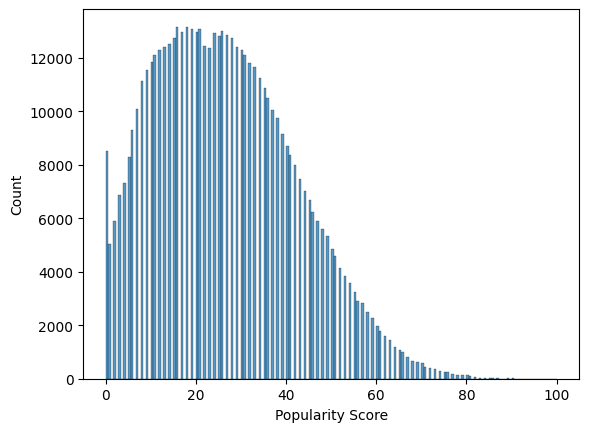

In [ ]:
sns.histplot(df["popularity"])
plt.xlabel("Popularity Score")
plt.show()

## Standardisierung
Die Daten müssen standardisiert werden, damit die unterschiedlichen Massstäbe der Werte die Koeffizienten der ML-Modelle nicht beeinträchtigen

In [ ]:
# X sind die vorhandenen Daten (alles ausser Popularity)
X = df.drop(["popularity"], axis=1)

# Y sind die vorherzusagenden Daten (Popularity Score)
y = df["popularity"]

# Auteilen in Trainings- und Testdaten zur Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)  # Zuerst 20% Testdaten für Vergleiche, dann 5% für finales Modell (test_size)

In [ ]:
# Die Popularity (Y) und die anderen Werte (X) werden separat skaliert
# Nach der Vorhersage muss die Popularity (Y) reskaliert werden, um die richtigen Werte zu erhalten

# Die Skaler werden nur an den Trainingsdaten angepasst, die Testdaten werden nicht berücksichtigt
# -> Die Testdaten existieren beim Modelltraining theoretisch noch nicht

X_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()

y_train = y_scaler.fit_transform(y_train.to_frame())
y_test = y_scaler.transform(y_test.to_frame())

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

## Export für Song Soulmate
Hinweis: Dieser Block ist für das ML nicht relevant und wurde erst nach dem Modelltraining ausgeführt.

In [ ]:
# Standardisieren der Werte für den Vergleich beim Song Soulmate
X_cols = [col for col in df.columns if col not in ['track_id', 'popularity']]
y_cols = ['popularity']

X = df[X_cols]
y = df[y_cols]

# Nutzen der bereits angepassten Skaler
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

# Track-ID soll nicht skaliert werden, wird separat eingefügt
track_id_array = df["track_id"].values.reshape(-1, 1)

# Zusammensetzen der Arrays
df_scaled = pd.DataFrame(
    data = np.hstack([track_id_array, y_scaled, X_scaled]),
    columns = ["track_id"] + y_cols + X_cols,
    index = df.index
    )

In [ ]:
# Export als CSV
df.to_csv(path + "spotify_data_similarity.csv")

## Lineare Regression

In [ ]:
# Initialisiere Modell
linreg = LinearRegression()

# Trainiere Modell
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Vorhersage auf dem Testset
y_pred = linreg.predict(X_test)

# Reskalierung nach Standardisierung
y_pred_rescaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("Linear Regression Results:")
print(f"Test RMSE: {mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)}")
print(f"Test MAE: {mean_absolute_error(y_test_rescaled, y_pred_rescaled)}")

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

Linear Regression Results:
Test RMSE: 12.342781298446653
Test MAE: 9.732098471990872


### Ridge Regularization (Reduziert Koeffizienten)

In [ ]:
# Initialisiere Modell
ridge = RidgeCV()

# Trainiere Modell
ridge.fit(X_train, y_train)

RidgeCV()

In [ ]:
# Vorhersage auf dem Testset
y_pred = ridge.predict(X_test)

# Reskalierung nach Standardisierung
y_pred_rescaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("RidgeCV Results:")
print(f"Test RMSE: {mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)}")
print(f"Test MAE: {mean_absolute_error(y_test_rescaled, y_pred_rescaled)}")

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

RidgeCV Results:
Test RMSE: 12.249003798018212
Test MAE: 9.687905705614495


### Lasso Regularization (Eliminiert Koeffizienten)

In [ ]:
# Initialisiere Modell
lasso = LassoCV()

# Trainiere Modell
lasso.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [ ]:
# Vorhersage auf dem Testset
y_pred = lasso.predict(X_test)

# Reskalierung nach Standardisierung
y_pred_rescaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("LassoCV Results:")
print(f"Test RMSE: {mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)}")
print(f"Test MAE: {mean_absolute_error(y_test_rescaled, y_pred_rescaled)}")

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

LassoCV Results:
Test RMSE: 12.251908373985563
Test MAE: 9.694391308034836


### Visualisierung Feature Importance

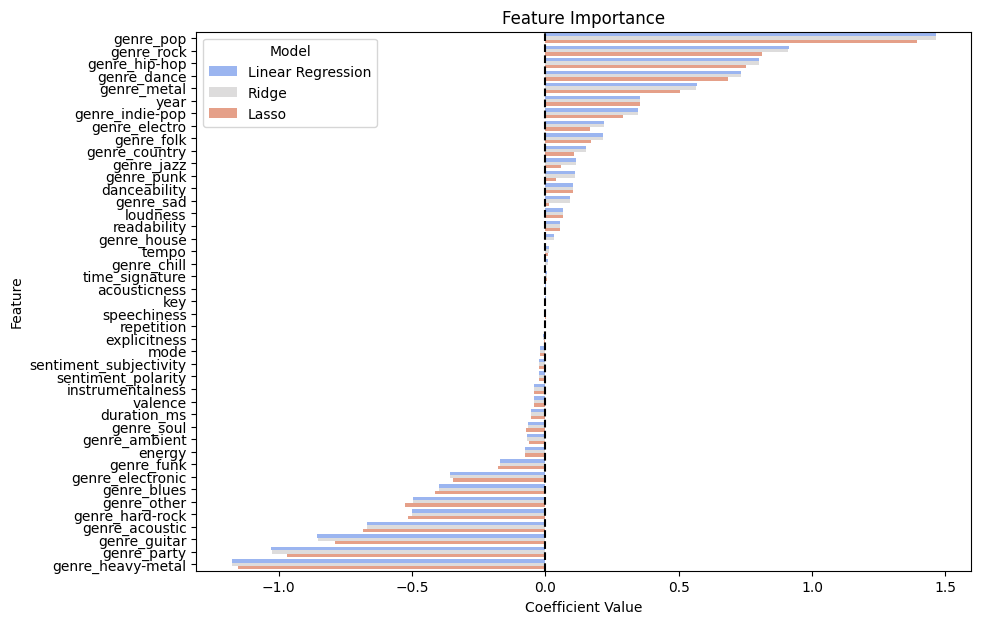

In [ ]:
# Koeffizienten extrahieren und in ein DataFrame umwandeln
coefs_df = pd.DataFrame({
    "Feature": X_train.columns,  # Spaltennamen der Eingabemerkmale
    "Linear Regression": linreg.coef_.flatten(),  # Koeffizienten der linearen Regression
    "Ridge": ridge.coef_.flatten(),               # Koeffizienten der Ridge-Regression
    "Lasso": lasso.coef_.flatten()                # Koeffizienten der Lasso-Regression
})

# Sortiere das DataFrame nach den Koeffizienten der linearen Regression (absteigend)
coefs_df = coefs_df.sort_values(by="Linear Regression", ascending=False)

# DataFrame ins "lange Format" umwandeln (für Seaborn-Plot geeignet)
coefs_melted = coefs_df.melt(id_vars="Feature", var_name="Modell", value_name="Koeffizient")

# Visualisierung: Barplot der Koeffizienten pro Modell und Merkmal
plt.figure(figsize=(10, 7))  # Größe der Abbildung festlegen
sns.barplot(x="Koeffizient", y="Feature", hue="Modell", data=coefs_melted, palette="coolwarm")

plt.axvline(x=0, color="black", linestyle="--")
plt.title("Feature-Wichtigkeit")
plt.xlabel("Wert des Koeffizienten")
plt.ylabel("Merkmal")
plt.legend(title="Modell")
plt.show()

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'
# Kommentierung auf Grundlage von ChatGPT

## Random Forest

In [ ]:
# Initialisiere Modell
forest = RandomForestRegressor()

# Trainiere Modell
forest.fit(X_train, y_train.ravel()) # 28 Minuten, 3.5GB Datei (Trees möglicherweise zu tief)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
# Vorhersage auf dem Testset
y_pred_forest = forest.predict(X_test)

# Reskalierung nach Standardisierung
y_pred_forest_rescaled = y_scaler.inverse_transform(y_pred_forest.reshape(-1, 1))
y_test_rescaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("Random Forest Results:")
print(f"Test RMSE: {mean_squared_error(y_test_rescaled, y_pred_forest_rescaled, squared=False)}")
print(f"Test MAE: {mean_absolute_error(y_test_rescaled, y_pred_forest_rescaled)}")

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

Random Forest Results:
Test RMSE: 11.437623743944823
Test MAE: 8.987871566688408


### Visualisierung Feature Importance

<ipython-input-11-90240e9bf748>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")


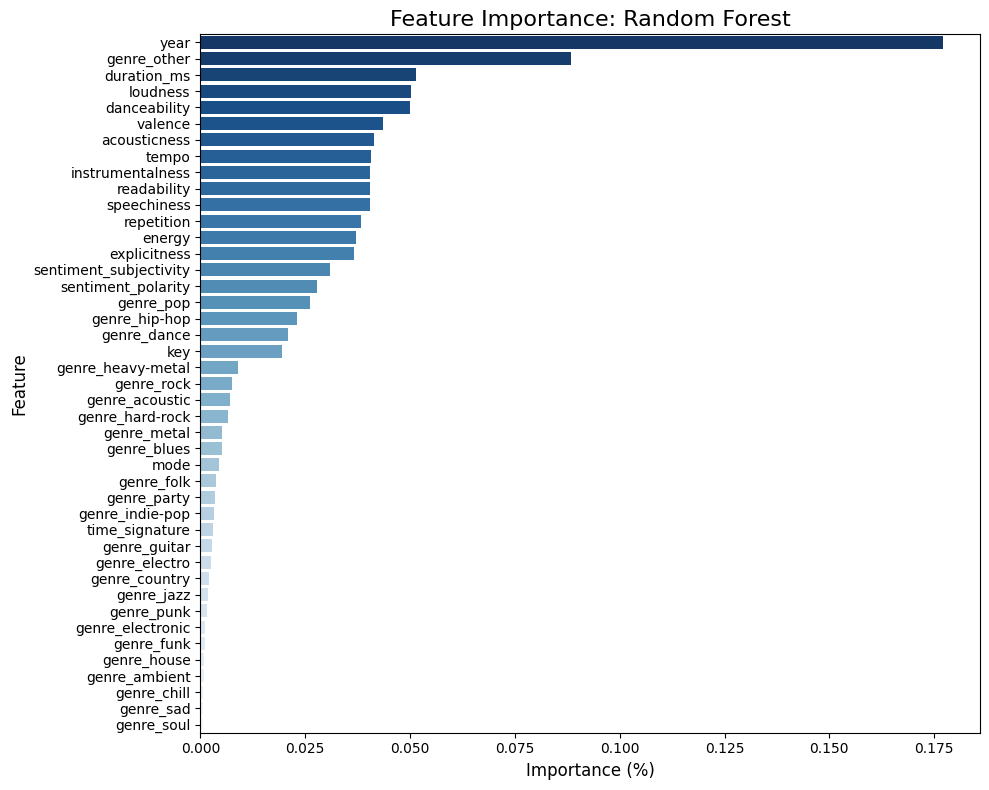

In [ ]:
# Werte aus dem trainierten Modell
importances = forest.feature_importances_

# DataFrame für Seaborn
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})

# Merkmale absteigend nach ihrer Wichtigkeit sortieren
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Abbildung zur Visualisierung
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")

# Achsenbeschriftungen und Titel
plt.title("Feature Importance: Random Forest", fontsize=16)
plt.xlabel("Importance (%)", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.tight_layout()
plt.show()

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

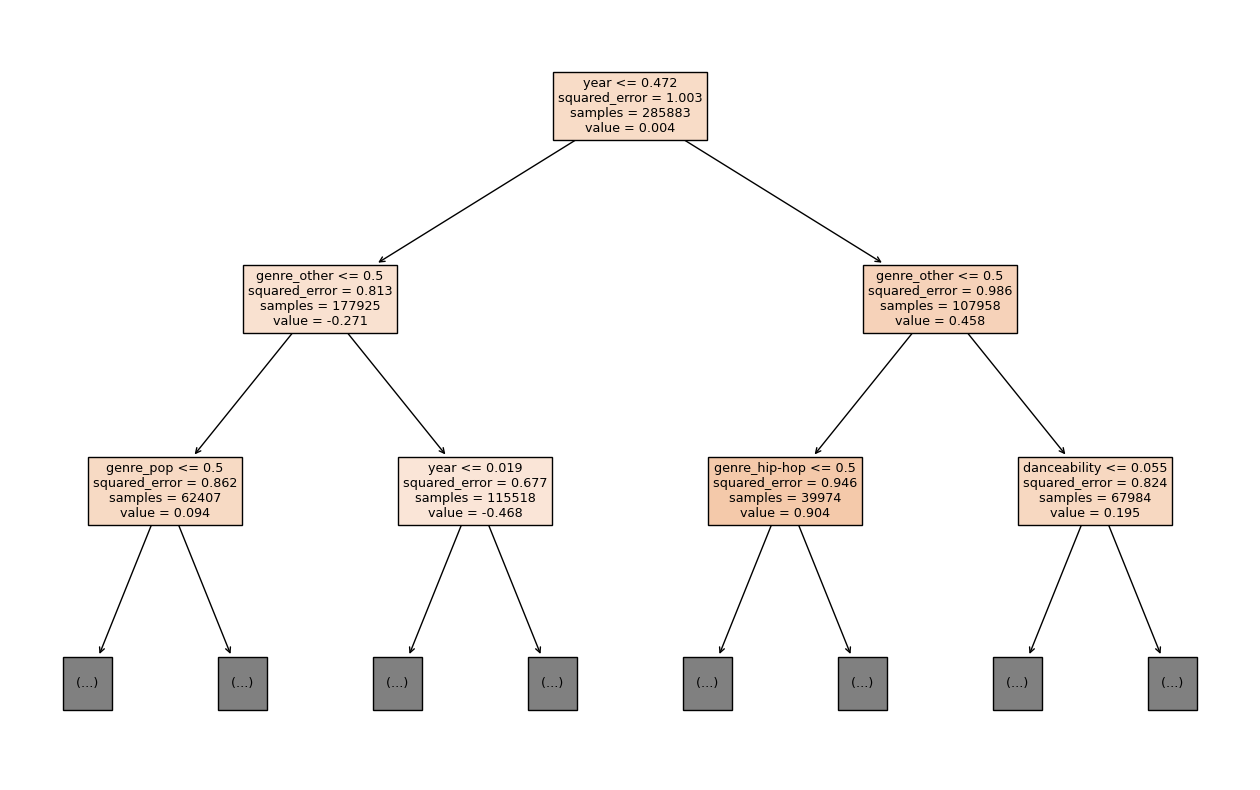

In [ ]:
from sklearn.tree import plot_tree

# Einzelnen Tree auswählen
single_tree = forest.estimators_[0]

# Tree anzeigen
fig, ax = plt.subplots(figsize=(16, 10))
plot_tree(single_tree, filled=True, max_depth=2, feature_names=X_train.columns, ax=ax)
plt.show()

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

## XGBoost

In [ ]:
# Initialisiere Modell
model_xgb = XGBRegressor(random_state=42, verbosity=1)  # Mehr Debug, Reproduzierbarkeit

# Trainiere Modell
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Vorhersage auf dem Testset
y_pred_xgb = model_xgb.predict(X_test)

# Reskalierung nach Standardisierung
y_pred_xgb_rescaled = y_scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))
y_test_rescaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("XGBoost Results:")
print(f"Test RMSE: {mean_squared_error(y_test_rescaled, y_pred_xgb_rescaled, squared=False)}")
print(f"Test MAE: {mean_absolute_error(y_test_rescaled, y_pred_xgb_rescaled)}")

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

XGBoost Results:
Test RMSE: 11.492402187219831
Test MAE: 9.011394004781419


## XGBoost mit Hyperparameter Tuning

In [ ]:
# Initialisiere Modell
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Übliche Verteilung von XGBoost-Parametern
param_dist = {
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': np.arange(50, 500, 50),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'gamma': np.linspace(0, 5, 5),
    'lambda': np.linspace(0, 10, 5),
    'alpha': np.linspace(0, 10, 5)
}

# Hyperparameter Tuning mit 100 Zufallskombinationen (n_iter=100)
# Bewertung anhand des negativen Mean Squared Error (scoring='neg_mean_squared_error')
# -> Negativ, da der Wert maximiert wird
# Die Cross-Validation mit 3 Folds (cv=3)
# Alle CPU-Kerne werden genutzt (n_jobs=-1)
# Fortschrittsanzeige (verbose=4)
random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_dist,
                                   n_iter=100, scoring='neg_mean_squared_error',
                                   cv=3, verbose=4, random_state=42, n_jobs=-1)

# Trainiere Modell
random_search.fit(X_train, y_train)

# Ausgabe der besten Parameterwerte
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.625, 'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.07444444444444444, 'lambda': 2.5, 'gamma': 2.5, 'colsample_bytree': 0.875, 'alpha': 0.0}
Best Score: 0.5262164417126033


In [ ]:
# Vorhersage auf dem Testset
y_pred_xgb = random_search.predict(X_test)

# Reskalierung nach Standardisierung
y_pred_xgb_rescaled = y_scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))
y_test_rescaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("XGBoost Results:")
print(f"Test RMSE: {mean_squared_error(y_test_rescaled, y_pred_xgb_rescaled, squared=False)}")
print(f"Test MAE: {mean_absolute_error(y_test_rescaled, y_pred_xgb_rescaled)}")

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

XGBoost Results:
Test RMSE: 11.349036197727436
Test MAE: 8.908755116279892


### Visualisierung Feature Importance

<ipython-input-25-91f627217bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Reds_r")


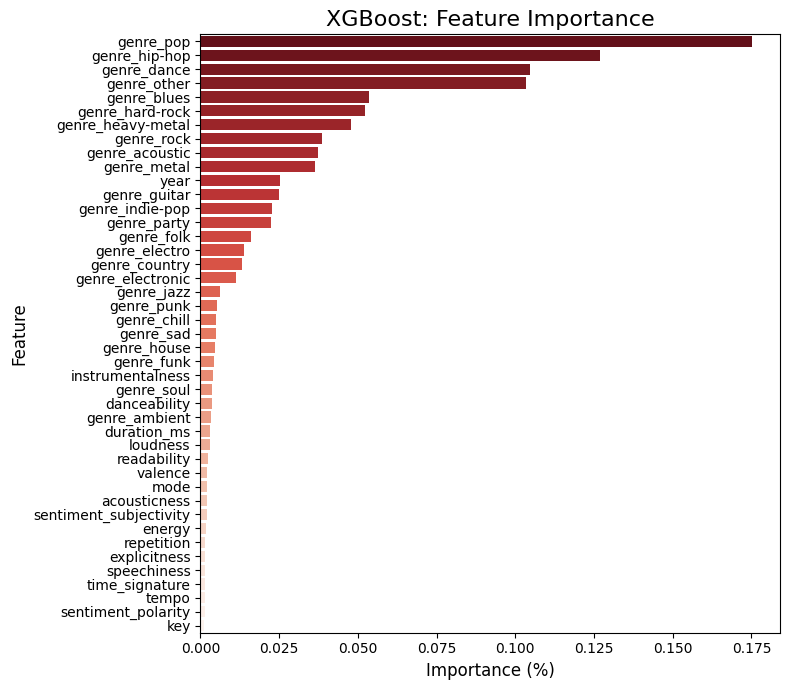

In [ ]:
# Werte aus dem trainierten Modell
importances = random_search.best_estimator_.feature_importances_

# DataFrame für Seaborn
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Merkmale absteigend nach ihrer Wichtigkeit sortieren
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Abbildung zur Visualisierung
plt.figure(figsize=(8, 7))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Reds_r")

# Achsenbeschriftungen und Titel
plt.title("XGBoost: Feature Importance", fontsize=16)
plt.xlabel("Importance (%)", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.tight_layout()
plt.show()

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

### Visualisierung Tatsächliche Werte vs. Vorhersage

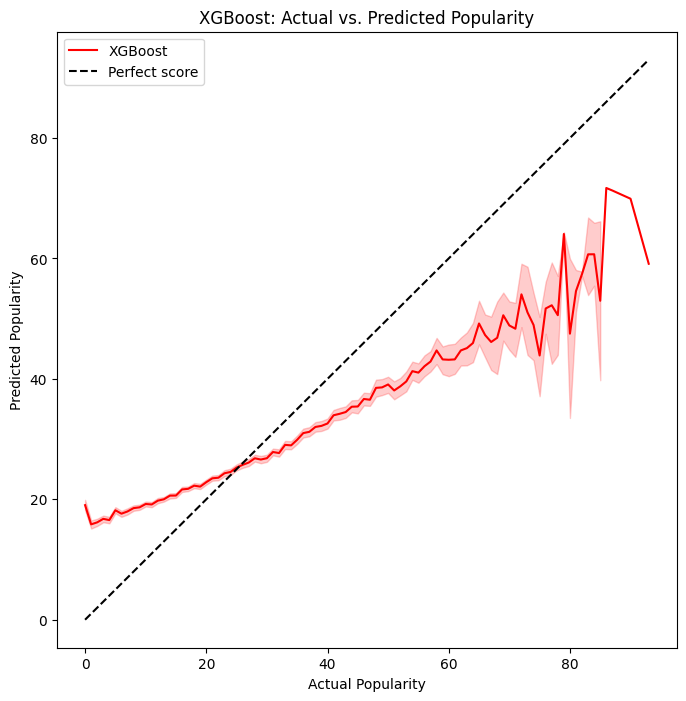

In [ ]:
# Erstelle Plot
plt.figure(figsize=(8, 8))

# Liniendiagramm, ravel() wandelt die Arrays in 1D-Form um
sns.lineplot(x=y_test_rescaled.ravel(), y=y_pred_xgb_rescaled.ravel(), label='XGBoost', color='red')

# Referenzlinie: perfekte Vorhersage (45-Grad-Linie)
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()],
         [y_test_rescaled.min(), y_test_rescaled.max()],
         color='black', linestyle='--', label='Perfect score')

# Achsenbeschriftungen und Titel
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("XGBoost: Actual vs. Predicted Popularity")

# Legende anzeigen
plt.legend()
plt.show()

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

## Neural Network

In [ ]:
# Initialisiere Modell
mlp = MLPRegressor(random_state=42, verbose=True)  # Reproduzierbarkeit und Fortschrittsanzeige

# Trainiere Modell
mlp.fit(X_train, y_train.ravel())

Iteration 1, loss = 0.30067378
Iteration 2, loss = 0.28842632
Iteration 3, loss = 0.28584236
Iteration 4, loss = 0.28408384
Iteration 5, loss = 0.28287827
Iteration 6, loss = 0.28196623
Iteration 7, loss = 0.28122441
Iteration 8, loss = 0.28067037
Iteration 9, loss = 0.27993892
Iteration 10, loss = 0.27920888
Iteration 11, loss = 0.27833600
Iteration 12, loss = 0.27764194
Iteration 13, loss = 0.27697846
Iteration 14, loss = 0.27655257
Iteration 15, loss = 0.27602295
Iteration 16, loss = 0.27560350
Iteration 17, loss = 0.27509245
Iteration 18, loss = 0.27487941
Iteration 19, loss = 0.27454849
Iteration 20, loss = 0.27425043
Iteration 21, loss = 0.27401455
Iteration 22, loss = 0.27385496
Iteration 23, loss = 0.27380831
Iteration 24, loss = 0.27359177
Iteration 25, loss = 0.27328295
Iteration 26, loss = 0.27332802
Iteration 27, loss = 0.27321101
Iteration 28, loss = 0.27305220
Iteration 29, loss = 0.27297985
Iteration 30, loss = 0.27292893
Iteration 31, loss = 0.27271312
Iteration 32, los

MLPRegressor(random_state=42, verbose=True)

In [ ]:
# Vorhersage auf dem Testset
y_pred_nn = mlp.predict(X_test)

# Reskalierung nach Standardisierung
y_pred_nn_rescaled = y_scaler.inverse_transform(y_pred_nn.reshape(-1, 1))
y_test_rescaled = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("Neural Network Results:")
print(f"Test RMSE: {mean_squared_error(y_test_rescaled, y_pred_nn_rescaled, squared=False)}")
print(f"Test MAE: {mean_absolute_error(y_test_rescaled, y_pred_nn_rescaled)}")

# Quelle: HSG-Kurs 'Business Analytics und Data Science Applications'

Neural Network Results:
Test RMSE: 11.423980745116177
Test MAE: 9.039458264592497


## ML-Modell Export
Export der trainierten Modelle mit Pickle für die Popularity-Vorhersage in der Streamlit App

In [ ]:
with open("X_scaler.pkl", "wb") as file:
    pickle.dump(X_scaler, file)

In [ ]:
with open("y_scaler.pkl", "wb") as file:
    pickle.dump(y_scaler, file)

In [ ]:
with open("linreg.pkl", "wb") as file:
    pickle.dump(linreg, file)

In [ ]:
with open("forest.pkl", "wb") as file:
    pickle.dump(forest, file)

In [ ]:
with open("xgboost_v4.pkl", "wb") as file:
    pickle.dump(model_xgb, file)

In [ ]:
with open("xgboost_v5.pkl", "wb") as file:
    pickle.dump(random_search, file)

In [ ]:
with open("nn.pkl", "wb") as file:
    pickle.dump(mlp, file)